# Pymaceuticals Inc.
---

### Analysis

The 4 treatment type results are very consistent as shown by the box plot - there was only 1 outlier in the data set.

There is a positive correlation between the weight of the mice and the tumor size as shown by the scatter plot.  
The P-Value of 0.84 between the two factors also supports this as it shows little reason to doubt the null hypothesis.

The Capomulin treatment in mouse b128 is effective as shown in the line graph as the tumor size decreased over the time period.
 

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.

unique = mouse_study_df["Mouse ID"].nunique()
unique


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = mouse_study_df[mouse_study_df['Mouse ID'] == 'g989']
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_study_clean_df = mouse_study_df[mouse_study_df['Mouse ID'] != 'g989']

In [6]:
# Checking the number of mice in the clean DataFrame.
unique = mouse_study_clean_df["Mouse ID"].nunique()
unique


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_mouse_study_df = mouse_study_clean_df.groupby(['Drug Regimen'])

mean_df = grouped_mouse_study_df['Tumor Volume (mm3)'].mean()
median_df = grouped_mouse_study_df['Tumor Volume (mm3)'].median()
var_df = grouped_mouse_study_df['Tumor Volume (mm3)'].var()
std_df = grouped_mouse_study_df['Tumor Volume (mm3)'].std()
sem_df = grouped_mouse_study_df['Tumor Volume (mm3)'].sem()


mouse_study_summary = pd.DataFrame({'Mean Tumor Volume': mean_df,
                                   'Median Tumor Volume': median_df,
                                   'Tumor Volume Variance': var_df,
                                   'Tumor Volume Std.Dev.': std_df,
                                   'Tumor Volume Std. Err.': sem_df})
mouse_study_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_agg = mouse_study_clean_df.groupby(['Drug Regimen']).agg(
    {
        "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
    }
)
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
regimen_counts = mouse_study_clean_df.groupby('Drug Regimen').size()
regimen_counts
regimen_counts.index

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

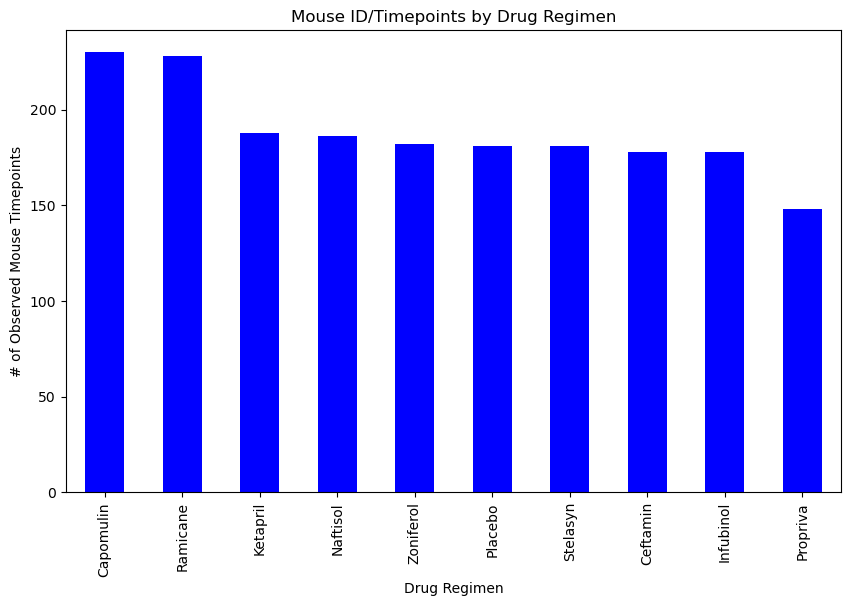

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = mouse_study_clean_df.groupby('Drug Regimen').size()

# Create a bar plot using the Pandas plot() method
regimen_counts.sort_values(ascending=False).plot(kind='bar', color='blue', figsize=(10, 6))

# Set the title and labels
plt.title('Mouse ID/Timepoints by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Show the plot
plt.show()

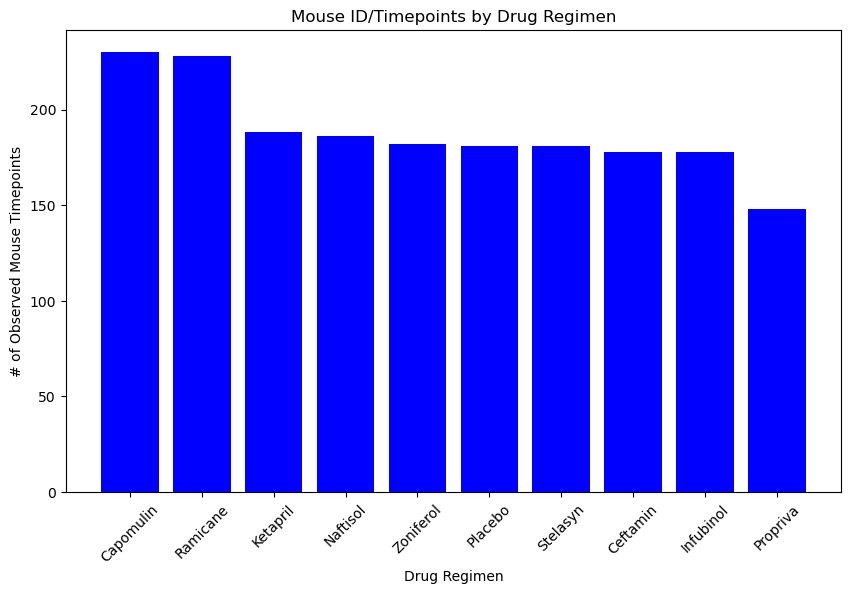

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = mouse_study_clean_df.groupby('Drug Regimen').size().sort_values(ascending=False)

# Create a bar plot using Matplotlib's PyPlot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts, color='blue')

# Set the title and labels
plt.title('Mouse ID/Timepoints by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

Text(0, 0.5, 'Sex')

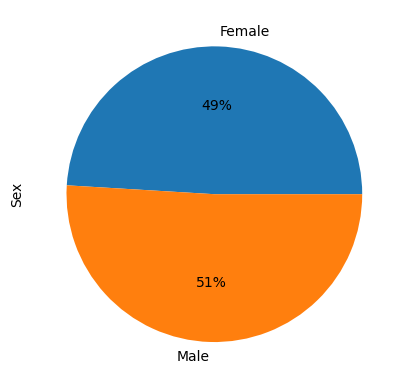

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = mouse_study_clean_df.groupby('Sex').size()
sex_counts

plot = sex_counts.plot(kind="pie", y="sex", autopct='%1.0f%%')
plot.set_ylabel("Sex")

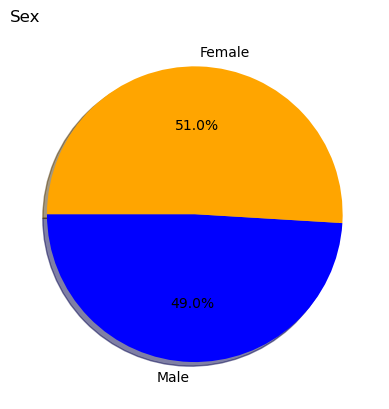

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
sizes = mouse_study_clean_df.groupby('Sex').size()
colors = ["blue", "orange"]
explode = (0,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
       autopct="%1.1f%%", shadow=True, startangle=180)
plt.title('Sex', loc='left')

plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
 
# Start by getting the last (greatest) timepoint for each mouse
tumor_max_timepoint = mouse_study_clean_df.groupby('Mouse ID')['Timepoint'].max()

# Create a DataFrame with the maximum timepoint for each mouse
tumor_max_timepoint_df = pd.DataFrame(tumor_max_timepoint).reset_index()
tumor_max_timepoint_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_max_merged_df = pd.merge(tumor_max_timepoint_df, mouse_study_clean_df, on=['Mouse ID', 'Timepoint'], how='inner')
tumor_max_merged_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_volumes = []

# Calculate the IQR for each treatment type and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes (and append to the empty list final_tumor_volumes)
for treatment in treatments:
    treatment_df = tumor_max_merged_df[tumor_max_merged_df['Drug Regimen'] == treatment]
    final_tumor_volumes = pd.Series(treatment_df['Tumor Volume (mm3)'])


 # Determine outliers using upper and lower bounds
    
    quartiles = final_tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    print(f"IQR for {treatment}: {iqr}")
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    print(f"Values below {lower_bound} could be outliers for {treatment}.")
    print(f"Values above {upper_bound} could be outliers for {treatment}.")
    print(f"Lower Bound for {treatment}: {lower_bound}")
    print(f"Upper Bound for {treatment}: {upper_bound}")

    # Check for outliers
    outliers_count = (final_tumor_volumes.loc[(treatment_df['Tumor Volume (mm3)'] >= upper_bound) |
                      (treatment_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {treatment} outliers: {outliers_count}')

IQR for Capomulin: 7.781863460000004
Values below 20.70456164999999 could be outliers for Capomulin.
Values above 51.83201549 could be outliers for Capomulin.
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Values below 17.912664470000003 could be outliers for Ramicane.
Values above 54.30681135 could be outliers for Ramicane.
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Values below 36.83290494999999 could be outliers for Infubinol.
Values above 82.74144559000001 could be outliers for Infubinol.
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Values below 25.355449580000002 could be outliers for Ceftamin.
Values above 87.66645829999999 could be outliers for Ceftamin.
Lo

In [16]:
# Create empty lists to store final tumor volumes for each drug regimen
capomulin_final_tumor_volumes = []
ramicane_final_tumor_volumes = []
infubinol_final_tumor_volumes = []
ceftamin_final_tumor_volumes = []

for index, row in tumor_max_merged_df.iterrows():
    if row['Drug Regimen'] == 'Capomulin':
        capomulin_final_tumor_volumes.append(row['Tumor Volume (mm3)'])
    elif row['Drug Regimen'] == 'Ramicane':
        ramicane_final_tumor_volumes.append(row['Tumor Volume (mm3)'])
    elif row['Drug Regimen'] == 'Infubinol':
        infubinol_final_tumor_volumes.append(row['Tumor Volume (mm3)'])
    elif row['Drug Regimen'] == 'Ceftamin':
        ceftamin_final_tumor_volumes.append(row['Tumor Volume (mm3)'])

treatment_tumor_volumes = [capomulin_final_tumor_volumes, ramicane_final_tumor_volumes, infubinol_final_tumor_volumes, ceftamin_final_tumor_volumes]


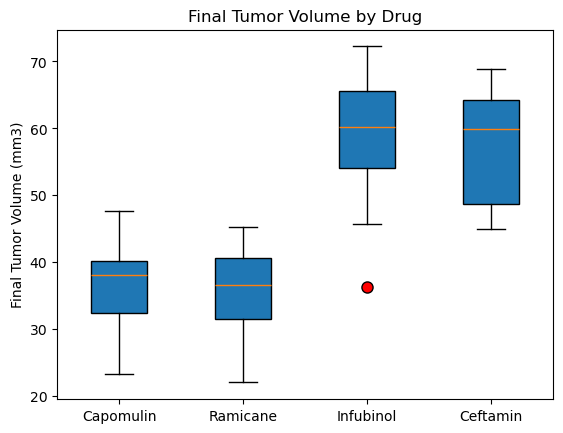

In [17]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

# Create empty lists to store final tumor volumes for each drug regimen
capomulin_final_tumor_volumes = []
ramicane_final_tumor_volumes = []
infubinol_final_tumor_volumes = []
ceftamin_final_tumor_volumes = []

for index, row in tumor_max_merged_df.iterrows():
    if row['Drug Regimen'] == 'Capomulin':
        capomulin_final_tumor_volumes.append(row['Tumor Volume (mm3)'])
    elif row['Drug Regimen'] == 'Ramicane':
        ramicane_final_tumor_volumes.append(row['Tumor Volume (mm3)'])
    elif row['Drug Regimen'] == 'Infubinol':
        infubinol_final_tumor_volumes.append(row['Tumor Volume (mm3)'])
    elif row['Drug Regimen'] == 'Ceftamin':
        ceftamin_final_tumor_volumes.append(row['Tumor Volume (mm3)'])

# Plot boxplot
plt.boxplot(treatment_tumor_volumes, patch_artist=True, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

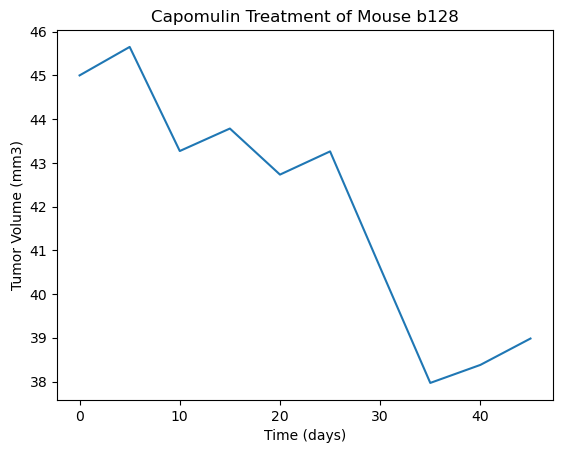

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mice = mouse_study_df[mouse_study_df['Drug Regimen'] == 'Capomulin']
single_mouse = capomulin_mice[capomulin_mice['Mouse ID'] == 'b128']
#single_mouse

#single_mouse, = plt.plot('Timepoint', 'Tumor Volume (mm3)')
plt.plot(single_mouse['Timepoint'], single_mouse['Tumor Volume (mm3)'])

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse b128")

# Display plot
plt.show()

In [19]:
capomulin_mice = mouse_study_df[mouse_study_df['Drug Regimen'] == 'Capomulin']
capomulin_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


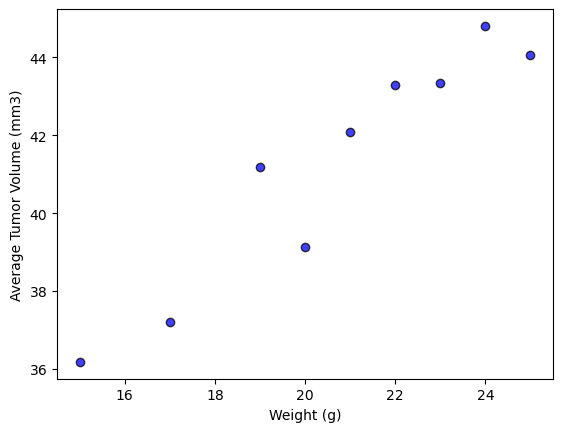

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_mice = mouse_study_df[mouse_study_df['Drug Regimen'] == 'Capomulin']

# Group the Capomulin mice data by weight and calculate the mean tumor volume
cap_avg_tumor_volume = capomulin_mice.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

# Generate the scatter plot with average tumor volume
plt.scatter(cap_avg_tumor_volume['Weight (g)'], cap_avg_tumor_volume['Tumor Volume (mm3)'],
            marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_mice = mouse_study_df[mouse_study_df['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID to get the average tumor volume and weight
cap_avg_data = capomulin_mice.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

# Calculate the correlation coefficient
correlation = st.pearsonr(cap_avg_data['Tumor Volume (mm3)'], cap_avg_data['Weight (g)'])
print(f"The correlation between both factors is {round(correlation[0], 2)}")

The correlation between both factors is 0.84


The r-squared is: 0.7088568047708723


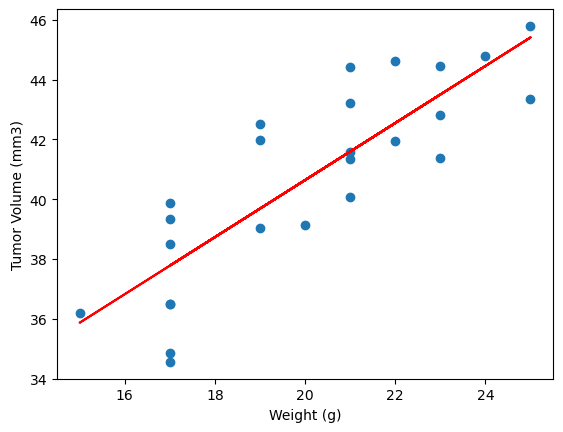

In [22]:
# Print out the r-squared value along with the plot.
x_values = cap_avg_data['Weight (g)']
y_values = cap_avg_data['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
print(f"The r-squared is: {rvalue**2}")
plt.show()